ImportError: cannot import name 'def_' from 'lambdex' (c:\Users\DEV2023\AppData\Local\Programs\Python\Python312\Lib\site-packages\lambdex\__init__.py)

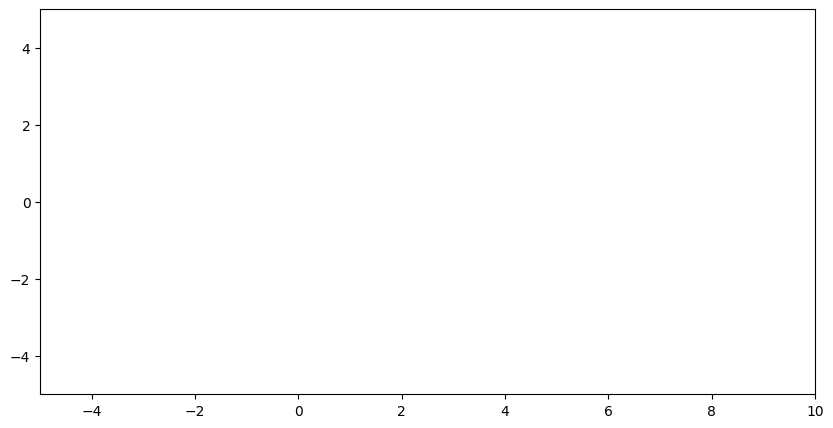

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

# Create a figure and axes
fig, axes = plt.subplots(figsize=(10, 5))

# Set limits
axes.set_xlim(-5, 10)
axes.set_ylim(-5, 5)

# Metadata for the animation
metadata = dict(title='Movie', artist='Pudim')

__data__ = []

class Point:
    def __init__(self,x,y) -> None:
        self.x = x
        self.y = y
        self.render, = axes.plot([],[],'o')
        self.function = lambda frame,self: self.set(self.x,self.y)
        self.set(self.x,self.y)
        __data__.append(self)

    def __call__(self):
        return self.render,

    def update(self,func):
        self.function = func

    def __update__(self,frame):
        self.function(frame,self)

    def set(self,x,y):
        self.x = x
        self.y = y
        self.render.set_data([x],[y])

class Line:
    def __init__(self,points,color) -> None:
        self.points = points
        self.color = color
        self.render, = axes.plot([],[],color=self.color)
        self.function = lambda frame,self: self.set(self.points)
        self.set(self.points)
        __data__.append(self)

    def __call__(self):
        return self.render,

    def update(self,func):
        self.function = func

    def __update__(self,frame):
        self.function(frame,self)

    def set(self,points):
        self.points = points
        __x_array__ = []
        __y_array__ = []
        if self.points[-1] == 'wrap':
            self.points[-1] = self.points[0]
        for point in self.points:
            __x_array__.append(point.x)
            __y_array__.append(point.y)
        self.render.set_data([__x_array__],[__y_array__])



# Function to update the data for each frame
def update(frame):
    __render_list__ = []
    for object in __data__:
        object.__update__(frame)
        __render_list__.append(object())
    return __render_list__,


def render():
    ani = FuncAnimation(fig, update, frames=np.linspace(0, 100, 100), interval=40, blit=False)
    # Save the animation
    ani.save('render.mp4', writer=FFMpegWriter(fps=15, metadata=metadata))
    # Display the static plot
    plt.show()


from IPython.display import Video
from lambdex import def_

square = [[1,1],[1,-1],[-1,-1],[-1,1]]

for idx, point in enumerate(square):
    square[idx] = Point(point[0],point[1])

for idx, point in enumerate(square):
    point.update(
        lambda frame,self:
            self.set(frame + self.x,self.y)
    )

Line(square+['wrap'],'blue')

render()



In [ ]:
Video("render.mp4")